In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv("BID_Stock_Data.csv")
df = df[['Close']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

In [3]:
# Split the data into training and testing sets
train_size = int(0.8 * len(df))
test_size = len(df) - train_size 
train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]

In [4]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])
# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [5]:
# 4. Quá trình testing \n",
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
y_pred = model.predict(x_test)

In [6]:
# 5. Quá trình tạo index predict 30 ngày tiếp theo\n",
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)
# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)
# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(x_next_30_days)
# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[38448.31819287 38460.78580102 38473.25340916 38485.72101731
 38498.18862546 38510.6562336  38523.12384175 38535.5914499
 38548.05905804 38560.52666619 38572.99427434 38585.46188248
 38597.92949063 38610.39709877 38622.86470692 38635.33231507
 38647.79992321 38660.26753136 38672.73513951 38685.20274765
 38697.6703558  38710.13796394 38722.60557209 38735.07318024
 38747.54078838 38760.00839653 38772.47600468 38784.94361282
 38797.41122097 38809.87882911]


In [7]:
# 6. Đánh giá độ chính xác test
#RMSE
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)
#MSLE
test_msle = np.mean((np.log1p(y_test) - np.log1p(y_pred))**2)
print('Testing MSLE:', test_msle)
# Mean Absolute Percentage Error (MAPE)
test_mape = 100 * np.mean(np.abs((y_test - y_pred) / y_test))
print('Testing MAPE:', test_mape)

Testing RMSE: 3948.008779114117
Testing MSLE: 0.01247465021302571
Testing MAPE: 9.081772552751662


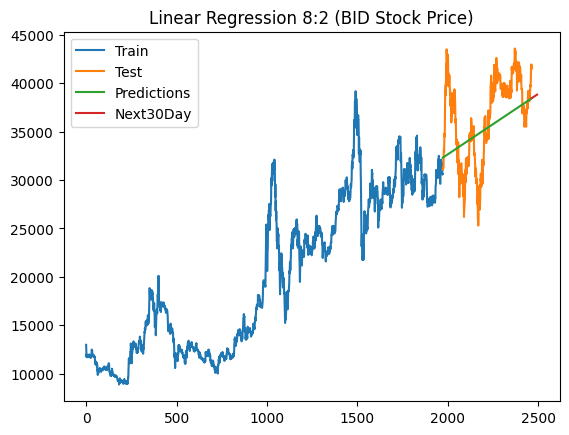

In [9]:
# 8.Vẽ hình
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Next30Day'])
plt.title('Linear Regression 8:2 (BID Stock Price)')
plt.show()